In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


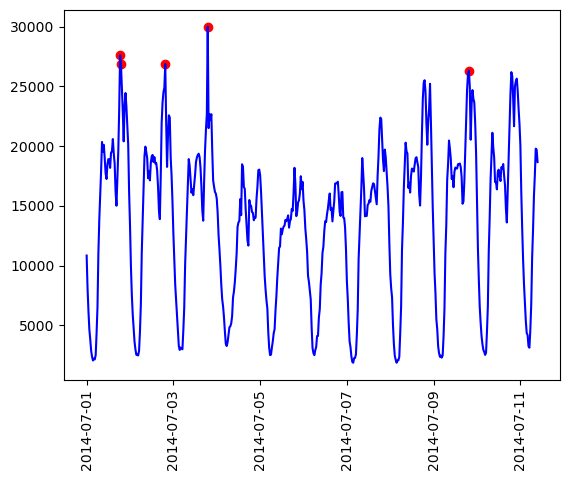

In [2]:
# Loads dataframe from csv file
# csv 파일에서 데이터프레임을 로드합니다.
X = pd.read_csv("/kaggle/input/nyc-taxi-traffic/dataset.csv",
                parse_dates=['timestamp'],
                index_col=0)

X = X.head(500)

# Initialize Classifier object
# 분류자 객체 초기화
isoforest = IsolationForest(contamination=float(0.01))

# Train Classifier object on Trained Data
# 훈련된 데이터에 대한 분류자 객체 훈련
isoforest.fit(pd.DataFrame(X['value']))

# Predict the response for test dataset
# 테스트 데이터 세트에 대한 응답 예측
predictions = isoforest.predict(pd.DataFrame(X['value']))

# Concatenates the predictions to the initial dataframe
# 예측을 초기 데이터프레임에 연결합니다.
datums = pd.concat([X.reset_index(drop=True), pd.DataFrame(predictions)], axis=1)

fig, ax = plt.subplots()

# Isolate anomaly times
# 이상 시간 격리
a = datums.loc[datums[0] == -1, ['timestamp', 'value']]

# Plot the initial data
# 초기 데이터를 그래프
ax.plot(X['timestamp'], X['value'], color='blue')

# Scatterplot the anomalies
# 이상 현상을 산점도 그래프
ax.scatter(a['timestamp'], a['value'], color='red')

plt.xticks(rotation=90)

plt.show()

In [3]:
X['weekday'] = X['timestamp'].dt.day
X

,timestamp,value,weekday
0,2014-07-01 00:00:00,10844,1
1,2014-07-01 00:30:00,8127,1
2,2014-07-01 01:00:00,6210,1
3,2014-07-01 01:30:00,4656,1
4,2014-07-01 02:00:00,3820,1
...,...,...,...
495,2014-07-11 07:30:00,15808,11
496,2014-07-11 08:00:00,17565,11
497,2014-07-11 08:30:00,19784,11
498,2014-07-11 09:00:00,19699,11
